#Handwritten Digit Recognition using Convolutional Neural Networks with Pytorch

## Summary

--------------------------------------------------------------------
**Step 4: Increase the Capacity, Correct MaxPooling Location etc**
--------------------------------------------------------------------

**Target:**
1.	Enhance the model capacity by incorporating additional layers at the end.
2.	Correct the position of max pooling in the model architecture.
3.	Fine-tune the learning rate to optimize model performance.
4.	Fine-tune the learning rate to optimize model performance.
**Results:**
1.	Parameters: 7K
2.	Best Training Accuracy: 98.94
3.	Best Test Accuracy: 99.46
**Analysis:**
1.	The implemented changes proved to be effective as the model successfully achieved a target accuracy of 99.4% after 15 epochs of training.


## Load srouce code files from git

In [ ]:
import os, sys, importlib

user = "Paurnima-Chavan"
repo = "mnist-S7"
src_dir = "src"

if os.path.isdir(repo):
    !rm -rf {repo}

!git clone https://github.com/{user}/{repo}.git

path = f"{repo}/{src_dir}"
if not path in sys.path:
    sys.path.insert(1, path)

Cloning into 'mnist-S6'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 19 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (19/19), 88.81 KiB | 977.00 KiB/s, done.


In [ ]:
import torch
import torch.optim as optim
import torch.nn.functional as F
from utils import train, test,plot_dataset_images, plot_train_test_accuracy_loss
from dataset import load_minst_data
from models import Net_4, model_summary

## Load MNIST Dataset

In [ ]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)
#------------- added below code
device = torch.device("cuda" if cuda else "cpu")
device

CUDA Available? True


device(type='cuda')

In [ ]:
train_loader , test_loader = load_minst_data(batch_size=64) #128

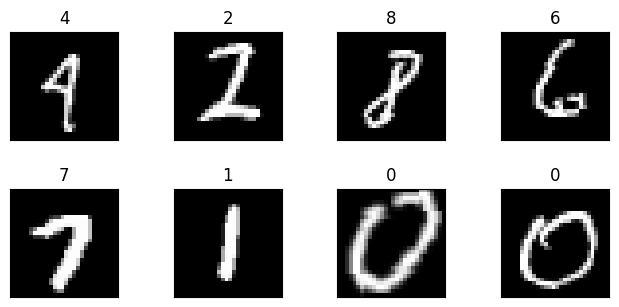

In [ ]:
plot_dataset_images(train_loader, 8)

## Load the model

### **Model 4**

In [ ]:
model = Net_4().to(device)
model_summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 128, 26, 26]           1,280
              ReLU-2          [-1, 128, 26, 26]               0
       BatchNorm2d-3          [-1, 128, 26, 26]             256
            Conv2d-4            [-1, 8, 26, 26]           1,032
            Conv2d-5            [-1, 8, 24, 24]             584
              ReLU-6            [-1, 8, 24, 24]               0
       BatchNorm2d-7            [-1, 8, 24, 24]              16
         MaxPool2d-8            [-1, 8, 12, 12]               0
            Conv2d-9            [-1, 8, 10, 10]             584
             ReLU-10            [-1, 8, 10, 10]               0
      BatchNorm2d-11            [-1, 8, 10, 10]              16
           Conv2d-12             [-1, 16, 8, 8]           1,168
             ReLU-13             [-1, 16, 8, 8]               0
      BatchNorm2d-14             [-1, 1

## Train the Model

### Model 11

In [ ]:
from tqdm import tqdm


model = Net_4().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.018, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=6, gamma=0.12, verbose=True)
num_epochs = 15
criterion = F.nll_loss


for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer,criterion)
  test(model, device, test_loader, criterion)
  scheduler.step()

Adjusting learning rate of group 0 to 1.8000e-02.
Epoch 1


Train: Loss=0.0810 Batch_id=937 Accuracy=93.27: 100%|██████████| 938/938 [00:30<00:00, 30.64it/s]


Test set: Average loss: 0.0007, Accuracy: 9860/10000 (98.60%)

Adjusting learning rate of group 0 to 1.8000e-02.
Epoch 2


Train: Loss=0.1012 Batch_id=937 Accuracy=97.53: 100%|██████████| 938/938 [00:34<00:00, 27.15it/s]


Test set: Average loss: 0.0006, Accuracy: 9881/10000 (98.81%)

Adjusting learning rate of group 0 to 1.8000e-02.
Epoch 3


Train: Loss=0.0722 Batch_id=937 Accuracy=97.85: 100%|██████████| 938/938 [00:31<00:00, 29.43it/s]


Test set: Average loss: 0.0006, Accuracy: 9892/10000 (98.92%)

Adjusting learning rate of group 0 to 1.8000e-02.
Epoch 4


Train: Loss=0.0435 Batch_id=937 Accuracy=98.12: 100%|██████████| 938/938 [00:30<00:00, 30.76it/s]


Test set: Average loss: 0.0005, Accuracy: 9891/10000 (98.91%)

Adjusting learning rate of group 0 to 1.8000e-02.
Epoch 5


Train: Loss=0.0234 Batch_id=937 Accuracy=98.18: 100%|██████████| 938/938 [00:33<00:00, 27.66it/s]


Test set: Average loss: 0.0004, Accuracy: 9913/10000 (99.13%)

Adjusting learning rate of group 0 to 1.8000e-02.
Epoch 6


Train: Loss=0.0077 Batch_id=937 Accuracy=98.28: 100%|██████████| 938/938 [00:31<00:00, 29.92it/s]


Test set: Average loss: 0.0004, Accuracy: 9927/10000 (99.27%)

Adjusting learning rate of group 0 to 2.1600e-03.
Epoch 7


Train: Loss=0.0297 Batch_id=937 Accuracy=98.72: 100%|██████████| 938/938 [00:31<00:00, 30.16it/s]


Test set: Average loss: 0.0003, Accuracy: 9933/10000 (99.33%)

Adjusting learning rate of group 0 to 2.1600e-03.
Epoch 8


Train: Loss=0.0233 Batch_id=937 Accuracy=98.82: 100%|██████████| 938/938 [00:31<00:00, 29.36it/s]


Test set: Average loss: 0.0003, Accuracy: 9944/10000 (99.44%)

Adjusting learning rate of group 0 to 2.1600e-03.
Epoch 9


Train: Loss=0.0194 Batch_id=937 Accuracy=98.90: 100%|██████████| 938/938 [00:30<00:00, 30.45it/s]


Test set: Average loss: 0.0003, Accuracy: 9940/10000 (99.40%)

Adjusting learning rate of group 0 to 2.1600e-03.
Epoch 10


Train: Loss=0.0391 Batch_id=937 Accuracy=98.78: 100%|██████████| 938/938 [00:30<00:00, 30.49it/s]


Test set: Average loss: 0.0003, Accuracy: 9944/10000 (99.44%)

Adjusting learning rate of group 0 to 2.1600e-03.
Epoch 11


Train: Loss=0.1368 Batch_id=937 Accuracy=98.88: 100%|██████████| 938/938 [00:32<00:00, 28.97it/s]


Test set: Average loss: 0.0003, Accuracy: 9938/10000 (99.38%)

Adjusting learning rate of group 0 to 2.1600e-03.
Epoch 12


Train: Loss=0.0201 Batch_id=937 Accuracy=98.86: 100%|██████████| 938/938 [00:30<00:00, 30.63it/s]


Test set: Average loss: 0.0003, Accuracy: 9944/10000 (99.44%)

Adjusting learning rate of group 0 to 2.5920e-04.
Epoch 13


Train: Loss=0.0130 Batch_id=937 Accuracy=98.92: 100%|██████████| 938/938 [00:31<00:00, 29.47it/s]


Test set: Average loss: 0.0003, Accuracy: 9947/10000 (99.47%)

Adjusting learning rate of group 0 to 2.5920e-04.
Epoch 14


Train: Loss=0.0937 Batch_id=937 Accuracy=98.92: 100%|██████████| 938/938 [00:30<00:00, 30.59it/s]


Test set: Average loss: 0.0003, Accuracy: 9945/10000 (99.45%)

Adjusting learning rate of group 0 to 2.5920e-04.
Epoch 15


Train: Loss=0.0088 Batch_id=937 Accuracy=98.94: 100%|██████████| 938/938 [00:30<00:00, 30.59it/s]


Test set: Average loss: 0.0003, Accuracy: 9946/10000 (99.46%)

Adjusting learning rate of group 0 to 2.5920e-04.


## Plot model performance

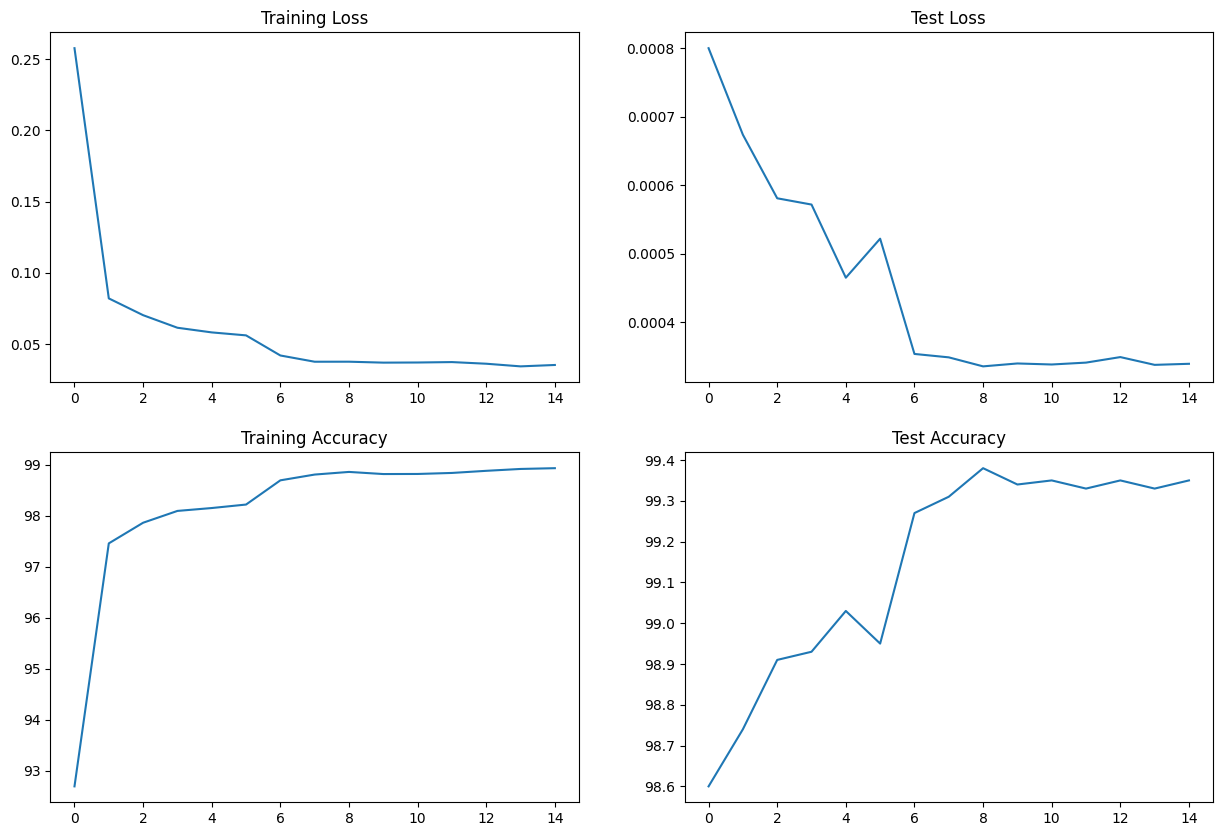

In [ ]:
plot_train_test_accuracy_loss()